### All of Statistics | Larry Wasserman | Solutions and Code by David A. Lee
### Chapter 3: Expectation

In [130]:
import numpy as np
from numpy.random import choice
import random
import statistics
import matplotlib.pyplot as plt
import scienceplots

1. Suppose we play a game where we start with $c$ dollars. On each play of the game you either double or halve your money, with equal probability. What is your expected fortune after $n$ trials?

Failed to find a Ghostscript installation.  Distillation step skipped.


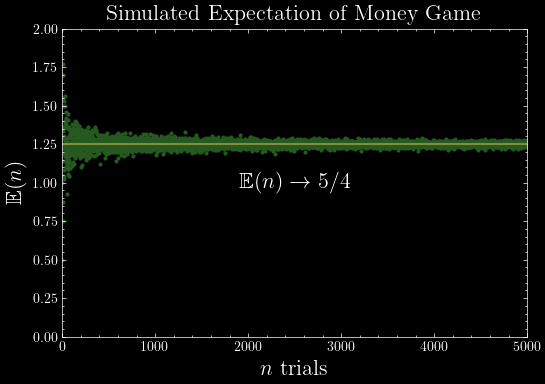

In [170]:
def moneygame(c): # function to determine whether our money is halved or doubled
    flip = random.randint(0,1) # 0 is halve, 1 is double
    if flip == 0:
        c = 0.5*c
    else:
        c = 2*c
    return c;

c = 1
n = 5000

def runs(n): # creating vector of expectations
    expectations = []
    for j in range(1,n+1):
        trials = []
        for i in range(1,j+1):
            trials.append(moneygame(c))
        mean = sum(trials)/len(trials)
        expectations.append(mean)
    return expectations;

plt.figure(figsize=(6,4))
plt.style.use(['science','scatter','dark_background'])
plt.scatter(list(range(1,n+1)), runs(n), marker='.', color="#25591f", linewidths=1.5)
plt.hlines(5/4, 0, n, colors="#818c3c", linestyles='solid', linewidths=1.5)
plt.text(n/2, 1, '$\mathbb{E}(n) \\rightarrow 5/4$', ha='center', va='center', fontsize=16)
plt.title('Simulated Expectation of Money Game', fontsize=16)
plt.xlabel('$n$ trials', fontsize=16)
plt.ylabel('$\mathbb{E}(n)$', fontsize=16)
plt.xlim(0,n)
plt.ylim(0,2)
plt.savefig('chap3ex1.eps', format='eps')
plt.show()

4. A particle starts at the origin of the real line and moves along the line in jumps of one unit. For each jump the probability is $p$ that the particle will jump one unit to the left and the probability is $1-p$ that the particle will jump one unit to the right. Let $X_n$ be the position of the particle after $n$ units. Find $\mathbb{E}(X_n)$ and $\mathbb{V}(X_n)$. (This is known as a **random walk**.)

Failed to find a Ghostscript installation.  Distillation step skipped.


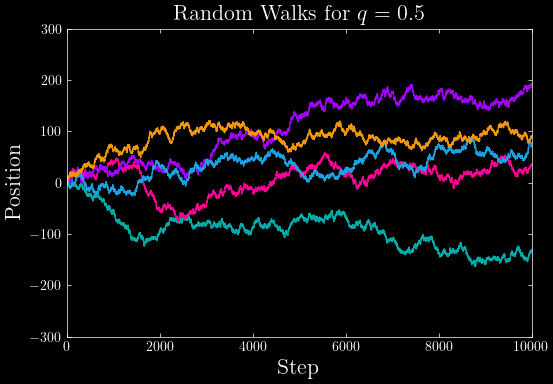

In [135]:
# functions for graphing the random walk

q = 0.5 # probability

def randomwalk(q): # function for random walk
    step = [-1,1]
    randomStep = choice( # probability q for -1 to the left, 1-q for +1 to the right
        step, 1, p=[q, 1-q])
    return randomStep.tolist()[0]

def trials(n): # function for giving us last position and list of ALL positions
    record = []
    position = 0
    for i in range(1,n+1):
        position = position + randomwalk(q)
        record.append(position)
    return position, record;

def multiplewalks(k,n): # function for generating k random walks, each with lists of ALL positions
    walklist = []
    for i in range(1,k+1):
        trials(n)
        walklist.append(trials(n)[1])
    return walklist;

k = 5
n = 10000

plt.figure(figsize=(6,4))
plt.style.use(['science','scatter','dark_background'])
plt.plot(list(range(1,n+1)), multiplewalks(k,n)[0], color='#00aba9')
plt.plot(list(range(1,n+1)), multiplewalks(k,n)[1], color='#ff0097')
plt.plot(list(range(1,n+1)), multiplewalks(k,n)[2], color='#a200ff')
plt.plot(list(range(1,n+1)), multiplewalks(k,n)[3], color='#1ba1e2')
plt.plot(list(range(1,n+1)), multiplewalks(k,n)[4], color='#f09609')
plt.title('Random Walks for $q={}$'.format(q), fontsize=16)
plt.xlabel('Step', fontsize=16)
plt.ylabel('Position', fontsize=16)
plt.xlim(0,n)
plt.ylim(-300,300)
plt.minorticks_off()
plt.savefig('chap3ex4i.eps', format='eps')
plt.show()

Failed to find a Ghostscript installation.  Distillation step skipped.


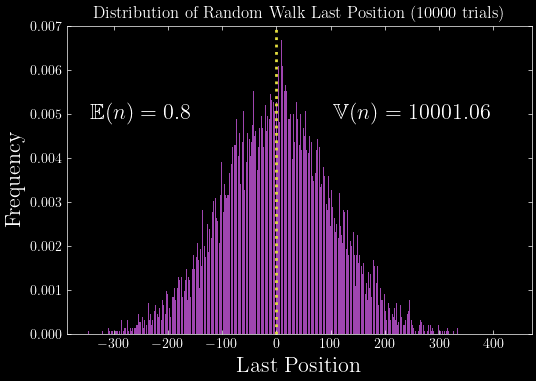

In [150]:
def trials(n):
    record = []
    position = 0
    for i in range(1,n+1):
        position = position + randomwalk(q)
    return position;

n = 10000
lastposition = []
for i in range(1, n+1):
    lastposition.append(trials(n))

e = statistics.mean(lastposition)
v = statistics.variance(lastposition)

plt.figure(figsize=(6,4))
plt.style.use(['science','scatter','dark_background'])
count, bins, ignored = plt.hist(lastposition, 500, density=True, color="#9f45b0")
plt.axvline(0, color="#e2dd3f", linestyle='dotted', linewidth=2, clip_on=False)
plt.title('Distribution of Random Walk Last Position ({} trials)'.format(n), fontsize=12)
plt.text(-250, 0.005, '$\mathbb{{E}}(n) = {}$'.format(round(e,2)), ha='center', va='center', fontsize=16)
plt.text(250, 0.005, '$\mathbb{{V}}(n) = {}$'.format(round(v,2)), ha='center', va='center', fontsize=16)
plt.xlabel('Last Position', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.minorticks_off()
plt.savefig('chap3ex4ii.eps', format='eps')
plt.show()


5. A fair coin is tossed until a head is obtained. What is the expected number of tosses that will be required?

Failed to find a Ghostscript installation.  Distillation step skipped.


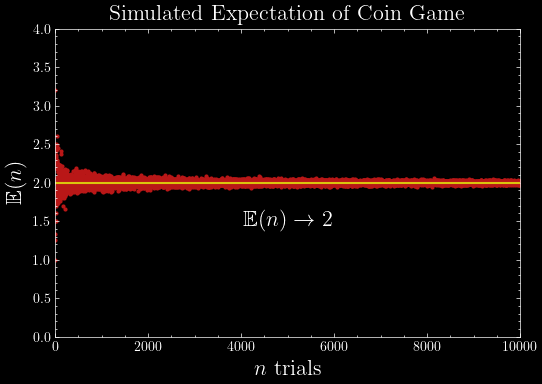

In [173]:
def cointoss(): # coin tosses until we flip one head
    tosses, heads = [], 0
    while (heads < 1):
        flip = random.randint(0,1)
        if (flip == 0):
            tosses.append('Heads')
            heads = tosses.count('Heads')
        else:
            tosses.append('Tails')
    return len(tosses);

def empirical(n): # empirically modeling the coin toss
    numtosses, probs = [], []
    for i in range(0,n):
        numtosses.append(cointoss())
    for x in np.unique(numtosses): # count amount of each unique number of tosses
        probs.append((x, numtosses.count(x)))
    return numtosses;

def trials(n): # coin toss game over 1, ..., n trials
    trials = []
    for i in range(1,n+1):
        trials.append(statistics.mean(empirical(i)))
    return trials;

n = 10000

plt.figure(figsize=(6,4))
plt.style.use(['science','scatter','dark_background'])
plt.scatter(list(range(1,n+1)), trials(n), marker='.', color="#b91717", linewidths=1.5)
plt.hlines(2, 0, n, colors="#dbc40e", linestyles='solid', linewidths=1.5)
plt.text(n/2, 1.5, '$\mathbb{E}(n) \\rightarrow 2$', ha='center', va='center', fontsize=16)
plt.title('Simulated Expectation of Coin Game', fontsize=16)
plt.xlabel('$n$ trials', fontsize=16)
plt.ylabel('$\mathbb{E}(n)$', fontsize=16)
plt.xlim(0,n)
plt.ylim(0,4)
plt.savefig('chap3ex5.eps', format='eps')
plt.show()

9. (Computer Experiment.) Let $X_1, ..., X_n$ be $N(0,1)$ random variables and let $\overline{X}_n = n^{-1} \sum^n_{i=1} X_i$. Plot $\overline{X}_n$ versus $n$ for $n = 1, ..., 10,000$. Repeat for $X_1, X_2, ..., X_n \sim$ Cauchy. Explain why there is such a difference.

Failed to find a Ghostscript installation.  Distillation step skipped.


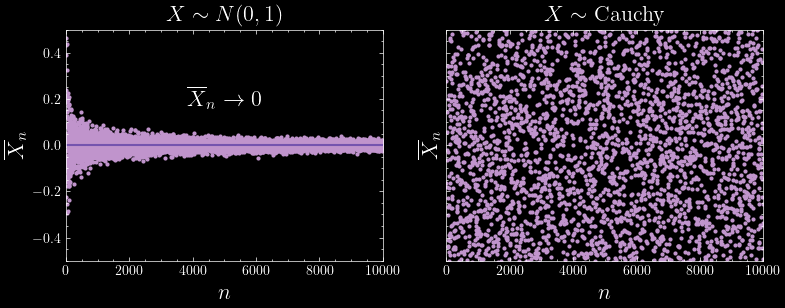

In [200]:
def normal(n):
    normalmeans = []
    for i in range(1,n+1):
        normalmeans.append(statistics.mean(np.random.normal(0,1,i)))
    return normalmeans;

def cauchy(n):
    cauchymeans = []
    for i in range(1,n+1):
        cauchymeans.append(statistics.mean(np.random.standard_cauchy(i)))
    return cauchymeans;

n = 10000

fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
plt.style.use(['science','scatter','dark_background'])
axs[0].scatter(list(range(1,n+1)), normal(n), marker='.', color="#c094cc", linewidths=1.5)
axs[0].hlines(0, 0, n, colors="#7554ae", linestyles='solid', linewidths=1.5)
axs[0].text(n/2, 0.2, '$\overline{X}_n \\rightarrow 0$', ha='center', va='center', fontsize=16)
axs[0].set_title('$X \sim N(0,1)$', fontsize=16)
axs[0].set_xlabel('$n$', fontsize=16)
axs[0].set_ylabel('$\overline{X}_n$', fontsize=16)
axs[0].set_xlim(0,n)
axs[0].set_ylim(-0.5,0.5)

axs[1].scatter(list(range(1,n+1)), cauchy(n), marker='.', color="#c094cc", linewidths=1.5)
axs[1].set_title('$X \sim$ Cauchy', fontsize=16)
axs[1].set_xlabel('$n$', fontsize=16)
axs[1].set_ylabel('$\overline{X}_n$', fontsize=16)
axs[1].set_xlim(0,n)
axs[1].set_ylim(-0.5,0.5)
plt.savefig('chap3ex9.eps', format='eps')
plt.show()

10. Let $X \sim N(0,1)$ and let $Y = e^X$. Find $\mathbb{E}(Y)$ and $\mathbb{V}(Y)$.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


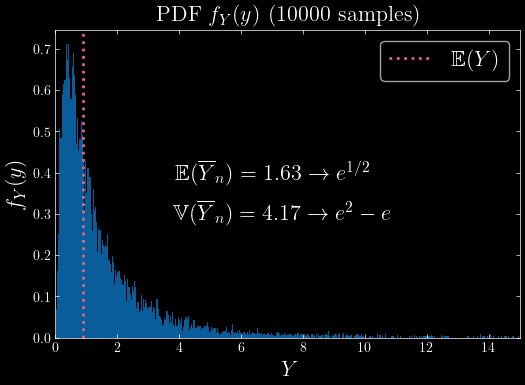

In [555]:
n = 10000 # number of samples

x = np.random.normal(0,1,n) # normal samples
y = np.exp(x) # exponential transformation
meany = round(statistics.mean(y),2)
vary = round(statistics.variance(y),2)

plt.figure(figsize=(6,4))
plt.style.use(['science','scatter','dark_background'])
count, bins, ignored = plt.hist(y, 1000, density=True, color="#095d9a")
expectation = plt.axvline(np.sqrt(e), color="#e16389", linestyle='dotted', linewidth=2, clip_on=False)
plt.title('PDF $f_Y(y)$ ({} samples)'.format(n), fontsize=16)
#plt.text(7, 0.4, "\\begin{{eqnarray*}}\mathbb{{E}}(\overline{{Y}}_n)&=& {} \\rightarrow e^{{1/2}} \\\\ \mathbb{{V}}(\overline{{Y}}_n)&=& {} \\rightarrow e^2 - e \\end{{eqnarray*}}".format(meany, vary), ha='center', va='center', fontsize=16)
plt.text(7, 0.4, "$\mathbb{{E}}(\overline{{Y}}_n) = {} \\rightarrow e^{{1/2}}$".format(meany), ha='center', va='center', fontsize=16)
plt.text(7.3, 0.3, "$\mathbb{{V}}(\overline{{Y}}_n) = {} \\rightarrow e^2 - e$".format(vary), ha='center', va='center', fontsize=16)
plt.xlabel('$Y$', fontsize=16)
plt.ylabel('$f_Y(y)$', fontsize=16)
plt.xlim(0,15)
plt.minorticks_off()
plt.legend([expectation], ['$\mathbb{E}(Y)$'], loc= 'upper right', frameon=True, fontsize=16)
plt.savefig('chap3ex10.eps', format='eps')
plt.show()

13. Suppose we generate a random variable $X$ in the following way. First we flip a fair coin. If the coin is heads, take $X$ to have a Unif $(0,1)$ distribution. If the coin is tails, take $X$ to  have a Unif $(3,4)$ distribution.

(a) Find the mean of $X$.

(b) Find the standard deviation of $X$.

The expected value is  2.004  and the standard deviation is  1.528


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


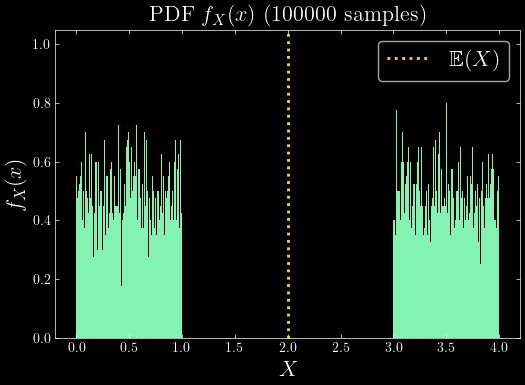

In [275]:
def coingame():
    flip = random.randint(0,1) # 0 is heads, 1 is tails
    if flip == 0:
        x = np.random.uniform(0,1)
    else:
        x = np.random.uniform(3,4)
    return x;

def samples(n):
    samples = []
    for i in range(1,n+1):
        samples.append(coingame())
    return samples;

n = 100000

exp = round(statistics.mean(samples(n)),3)
sd = round(np.sqrt(statistics.variance(samples(n))),3)
print('The expected value is ', exp, ' and the standard deviation is ', sd)

plt.figure(figsize=(6,4))
plt.style.use(['science','scatter','dark_background'])
count, bins, ignored = plt.hist(samples(n), 10000, density=True, color="#84f2b3")
expectation = plt.axvline(2, color="#ffde17", linestyle='dotted', linewidth=2, clip_on=False)
plt.title('PDF $f_X(x)$ ({} samples)'.format(n), fontsize=16)
plt.xlabel('$X$', fontsize=16)
plt.ylabel('$f_X(x)$', fontsize=16)
plt.minorticks_off()
plt.legend([expectation], ['$\mathbb{E}(X)$'], loc= 'upper right', frameon=True, fontsize=16)
plt.savefig('chap3ex13.eps', format='eps')
plt.show()

19. This question is to help you understand the idea of a **sampling distribution**. Let $X_1, . . . , X_n$ be IID with mean $\mu$ and variance $\sigma^2$. Let $\overline{X}_n = n^{-1} \sum^n_{i=1} X_i$. Then $\overline{X}_n$ is a **statistic**, that is, a function of the data. Since $\overline{X}_n$ is a random variable, it has a distribution. This distribution is called the _sampling distribution of the statistic_. Recall from Theorem 3.17 that $\mathbb{E}(\overline{X}_n) = \mu$ and $\mathbb{V}(\overline{X}_n) = \sigma^2/n$. Don’t confuse the distribution of data $f_X$ and the distribution of the statistic $f_{\overline{X}_n}$. To make this clear, let $X_1, . . . , X_n \sim$ Uniform $(0, 1)$. Let $f_X$ be the density of the Uniform $(0,1)$. Plot $f_X$. Now let $\overline{X}_n = n^{-1} \sum^n_{i=1} X_i$. Find $\mathbb{E}(\overline{X}_n)$ and $\mathbb{V}(\overline{X}_n)$. Plot them as a function of $n$. Interpret. Now simulate the distribution of $\overline{X}_n$ for $n = 1, 5, 25, 100$. Check that the simulated values of $\mathbb{E}(\overline{X}_n)$ and $\mathbb{V}(\overline{X}_n)$ agree with your theoretical calculations. What do you notice about the sampling distribution of $X_n$ as $n$ increases?

Failed to find a Ghostscript installation.  Distillation step skipped.


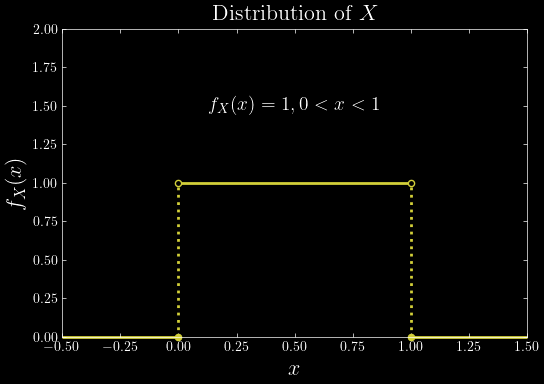

In [288]:
# plotting f_X

plt.figure(figsize=(6,4))
plt.style.use(['science','scatter','dark_background'])

x_hollow, y_xhollow = [0,1], [1,1]
x_solid, y_xsolid = [0,1], [0,0]
h_xlines, x_start, x_end = [0, 0, 1], [-0.5, 1, 0], [0, 1.5, 1]
v_xlines, y_xstart, y_xend = [0,1], [0,0], [1,1]
count, bins, ignored = axs[0].hist(x, 150, density=True, color="#3c989b")
plt.scatter(x_hollow, y_xhollow, s=20, facecolors='k', edgecolors='#d2cf39', zorder=2, clip_on=False) # hollow points
plt.scatter(x_solid, y_xsolid, s=20, facecolors='#d2cf39', edgecolors='#d2cf39', zorder=2, clip_on=False) # solid points
plt.hlines(h_xlines, x_start, x_end, colors='#d2cf39', linestyles='solid', linewidths=2, zorder=1, clip_on=False)
plt.vlines(v_xlines, y_xstart, y_xend, colors='#d2cf39', linestyles='dotted', linewidths=2, zorder=1, clip_on=False)
plt.title('\\text{Distribution of} $X$', fontsize=16)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$f_X(x)$', fontsize=16)
plt.text(0.5, 1.5, '$f_X(x) = 1, 0 < x < 1$', ha='center', va='center', fontsize=14)
plt.xlim([-0.5, 1.5])
plt.ylim([0,2])
plt.minorticks_off()

plt.savefig('chap3ex19i.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


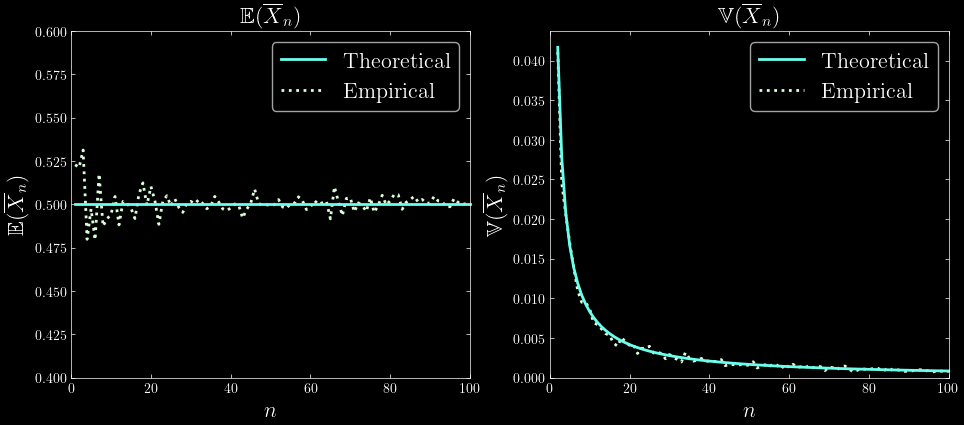

In [442]:
# plotting sample mean and variance

n = 100 # number of variables
m = 100 # number of samples drawn from each variable
ne = list(range(1, k+1))
nv = list(range(2, k+1))

def xbarexp(n,m): # (num variables, num samples)
    means = []
    for i in range(1,n+1):
        means.append(np.random.uniform(0,1,size=(m,i)).mean(axis=1).mean(axis=0)) # syntax: m is number of samples, i is number of variables
        # np.random.uniform(0,1,size=(m,i)).mean(axis=1) contains values of Xbar_n for all m samples 
        # adding .mean(axis=0) then calculates the expectation of all of the m Xbar_n sample values for i number of variables
        # means.append adds the expectation for 1, 2, ..., n number of variables to our list
    return means; 

def xbarvar(n,m): # (num variables, num samples)
    vars = []
    for i in range(2,n+1):
        vars.append(np.random.uniform(0,1,size=(m,i)).mean(axis=1).var(axis=0)) # syntax: m is number of samples, i is number of variables
        # np.random.uniform(0,1,size=(m,i)).mean(axis=1) contains values of Xbar_n for all m samples 
        # adding .var(axis=0) then calculates the variance of all of the m Xbar_n sample values for i number of variables
        # vars.append adds the variances for 1, 2, ..., n number of variables to our list
    return vars; 

fig, axs = plt.subplots(1, 2, figsize=(9, 4.5), sharey=False)
plt.style.use(['science','scatter','dark_background'])
plt.subplots_adjust(left=None, bottom=None, right=1.1, top=None, wspace=None, hspace=None)

axs[0].plot(ne, [1/2]*len(ne), color="#6affed", linewidth=2, zorder=2, clip_on=False, label='Theoretical')
axs[0].plot(ne,xbarexp(n,m), color="#d9ffd8", linestyle='dotted', linewidth=2, zorder=1, clip_on=False, label='Empirical')
axs[0].set_title('$\mathbb{E}(\overline{X}_n)$', fontsize=16)
axs[0].set_xlabel('$n$', fontsize=16)
axs[0].set_ylabel('$\mathbb{E}(\overline{X}_n)$', fontsize=16)
axs[0].set_xlim([0,k])
axs[0].set_ylim([0.4,0.6])
axs[0].legend(loc= 'upper right', frameon=True, fontsize=16)
axs[0].minorticks_off()

axs[1].plot(nv, [1/(12*i) for i in nv], color="#6affed", linewidth=2, zorder=2, clip_on=False, label='Theoretical')
axs[1].plot(nv,xbarvar(n,m), color="#d9ffd8", linestyle='dotted', linewidth=2, zorder=1, clip_on=False, label='Empirical')
axs[1].set_title('$\mathbb{V}(\overline{X}_n)$', fontsize=16)
axs[1].set_xlabel('$n$', fontsize=16)
axs[1].set_ylabel('$\mathbb{V}(\overline{X}_n)$', fontsize=16)
axs[1].set_xlim([0,k])
axs[1].set_ylim(0)
axs[1].legend(loc= 'upper right', frameon=True, fontsize=16)
axs[1].minorticks_off()

plt.savefig('chap3ex19ii.eps', format='eps')
plt.show()


Failed to find a Ghostscript installation.  Distillation step skipped.


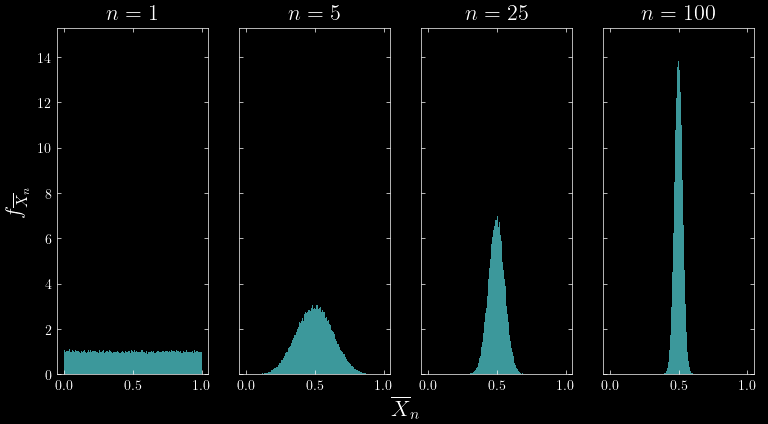

In [551]:
# plotting distributions of Xbar_n

m = 1000000 # number of samples
n1, n2, n3, n4 = 1,5,25,100 # number of variables
variables = [n1, n2, n3, n4]

def xbar(n, m): # (num variables, num samples)
    dist = np.random.uniform(0,1,size=(m,n)).mean(axis=1) # syntax: m is number of samples, i is number of variables
    return dist; # returns m samples of Xbar_n for n number of variables

fig, axs = plt.subplots(1, 4, figsize=(9, 4.5), sharey=True, sharex=True)
plt.style.use(['science','scatter','dark_background'])
#plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=None, hspace=None)

for ax, variable in zip(axs.flat, variables):
    count, bins, ignored = ax.hist(xbar(variable,m), 1500, density=True, color="#3c989b")
    ax.set_title('$n = {}$'.format(variable), fontsize=16)
    ax.minorticks_off()    

# big axes for common label
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.minorticks_off()
plt.xlabel('$\overline{X}_n$', fontsize=16)
plt.ylabel('$f_{\overline{X}_n}$', fontsize=16)

plt.savefig('chap3ex19iii.eps', format='eps')
plt.show()